In [2]:
using StatsBase
using Plots
using Random

In [2]:
function insertRequest!(queues, N)
#     idx = sample(1:size(queues)[1])
#     idx = sample(1:size(queues)[1], Weights(1:size(queues)[1]))
#     idx = sample(1:size(queues)[1], Weights(vec(1 .+ sum(queues, dims=2))))
    idx = sample(1:size(queues)[1], Weights(vec(1 .+ sum(sqrt.(queues), dims=2))))
    
    neighbours = [-1,1]
    rejected = true
    for neighbour in vcat(0, shuffle(neighbours))
        queue = @view queues[mod1(idx+neighbour, N),:]
        ones_idx = findall(x -> x==1, queue)
        if queue[1] == 0
            if length(ones_idx) == 0
                queue[end] = 1
            else
                if rand() < 0.00
                    queue[rand(1:length(ones_idx))] = 1
#                     queue[1] = 1
                else
                    queue[ones_idx[1]-1] = 1
                end
            end
            rejected = false
            break
        end
    end
    
    return rejected
end


function timeStep!(queues, N)
    travel_time = 5 #1/ν
    for i in 1:size(queues)[1]
        queue = @view queues[i,:]
        queue_occupancy = sum(queue)
        if queue_occupancy == 0
            dq_rate = 0
        else
#             dq_rate = 1/(2*N)*(2-1/queue_occupancy)
            dq_rate = (queue_occupancy-1/2)/travel_time
        end
        
        if rand() < dq_rate
            queue[:] = circshift(queue,1)
#             queue[2:end] = queue[1:end-1]
            queue[1] = 0
        end
    end
end;

In [3]:

# queues_track = Array{Float64}(undef,length(times),N,S)

function compute(N,S)
    queues = zeros(Int64,N,S)
    times = 1:10000
    sum_rejected = 0
    for t in times
        sum_rejected += insertRequest!(queues, N)
        timeStep!(queues, N)
    #     queues_track[t,:,:] = queues
    end
    
    return sum_rejected
end

compute (generic function with 1 method)

In [4]:
# N_queues = 1:100:10000
N_queues = 1:10:2000
S = 3

@time rejected = compute.(N_queues, S);

 50.907791 seconds (38.46 M allocations: 76.643 GiB, 5.41% gc time, 2.05% compilation time)


In [3]:
gr()
p = scatter(N_queues, rejected)
ylims!(p,(0,maximum(rejected)*1.1))

LoadError: UndefVarError: N_queues not defined

┌ Info: Saved animation to 
│   fn = /home/helge/Applications/matsim/matsim-bimodal.git/master/python_analysis/test.gif
└ @ Plots /home/helge/.julia/packages/Plots/FKcum/src/animation.jl:104


Plots.AnimatedGif("/home/helge/Applications/matsim/matsim-bimodal.git/master/python_analysis/test.gif")
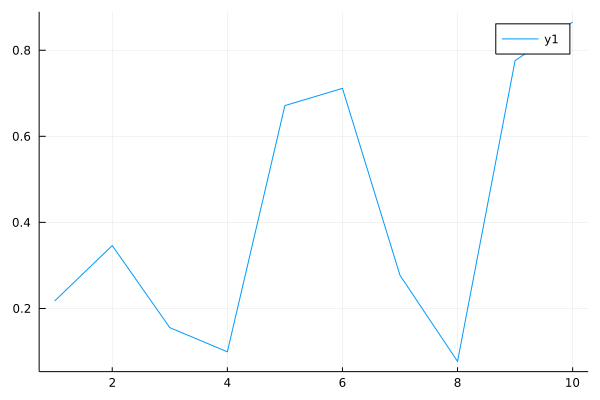

In [6]:
gr()
anim = @animate for i=1:10
#     heatmap(queues_track[i,:,:])
    plot(rand(10))
end

gif(anim, "./test.gif", fps=10)
# loadpath="/home/helge/"
# name_ending_in_mp4="bla.mp4"
# run( `ffmpeg -framerate 15 -i $loadpath"%06d.png" -vcodec libx264 -crf 25 $name_ending_in_mp4` )

In [216]:
gr()

p = plot([sin, cos], zeros(0), leg = false, xlims = (0, 2π), ylims = (-1, 1))
anim = Animation()
for x = range(0, stop = 2π, length = 20)
    push!(p, x, Float64[sin(x), cos(x)])
    frame(anim)
end

mp4(anim, "test.mp4")

LoadError: failed process: Process(`[4m/home/helge/.julia/artifacts/7f40eeb66d90d3026ae5fb68761c263b57adb840/bin/ffmpeg[24m [4m-v[24m [4m16[24m [4m-framerate[24m [4m20[24m [4m-i[24m [4m/tmp/jl_zfj5CJ/%06d.png[24m [4m-vf[24m [4mformat=yuv420p[24m [4m-loop[24m [4m0[24m [4m-y[24m [4m/home/helge/Applications/matsim/matsim-bimodal.git/master/python_analysis/test.mp4[24m`, ProcessSignaled(11)) [0]


In [45]:
test = rand(4,4)
idx = findall(x -> x<0.2, test)
# idx2 = CartesianIndices(size(test[:,0]))
oned = test[1,:]
display(oned)
display(oned[length(oned)])
oned[end] = 5
display(last(oned))
# display(idx2)
# display(test[idx2[3]])

4-element Vector{Float64}:
 0.641263465615747
 0.3226468479688398
 0.6812925948198276
 0.8760917353551079

0.8760917353551079

5.0

In [46]:
display(test)
# oned = view(test,1,:)
oned = test[1,:]
display(oned)

4×4 Matrix{Float64}:
 0.641263   0.322647  0.681293  0.876092
 0.871868   0.924407  0.221311  0.718584
 0.0212087  0.405647  0.896843  0.134362
 0.708333   0.927963  0.687872  0.383915

4-element Vector{Float64}:
 0.641263465615747
 0.3226468479688398
 0.6812925948198276
 0.8760917353551079

In [47]:
oned[2] = 4
display(test)

4×4 Matrix{Float64}:
 0.641263   0.322647  0.681293  0.876092
 0.871868   0.924407  0.221311  0.718584
 0.0212087  0.405647  0.896843  0.134362
 0.708333   0.927963  0.687872  0.383915

In [49]:
println(findall(x->x<0.9, oned))

[1, 3, 4]
